In [8]:
import zipfile
with zipfile.ZipFile('/home/hso6b/DL/dl_data.zip', 'r') as zip_ref:
    zip_ref.extractall('/home/hso6b/dl_data')

In [146]:
import numpy as np
import sys
import pandas as pd 
from keras.layers import Input, Lambda, Dense, Flatten , Dropout , MaxPool2D
from keras.models import Model , Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from glob import glob
import random
import os
from distutils.file_util import copy_file
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau
import sklearn
import matplotlib as mpl
import matplotlib.pyplot as plt
from functools import partial
import PIL
import PIL.Image
import random as python_random
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import *
import torch
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision import models
from torch import optim

In [3]:
data_path = 'dl_data_2/dl_data/'
class_names = os.listdir(data_path)
class_names

['Covid_img', 'Viral_img', 'Normal_img']

## Load and Image count statistics

In [5]:
data_dir = "dl_data_2/dl_data"
HOLD_dir = "dl_data_2/HOLD_data"

In [44]:
train_data_gen = ImageDataGenerator(rescale=1./255 ,
                                    zoom_range=0.3, 
                                    horizontal_flip=True, 
                                    shear_range=0.2,
                                    rotation_range=30,
                                    validation_split=0.2)

train = train_data_gen.flow_from_directory(directory=data_dir,
                                           class_mode ='categorical',
                                           subset='training',
                                           seed=42,
                                           batch_size=64,
                                           target_size=(224,224))  

val = train_data_gen.flow_from_directory(directory=data_dir, 
                                         follow_links=False,
                                         subset='validation',
                                         interpolation='nearest',
                                         target_size=(224, 224), 
                                         class_mode='categorical',
                                         shuffle=True,
                                         seed=42,
                                         batch_size=64)

test_data_gen = ImageDataGenerator(rescale=1./255 )

test = test_data_gen.flow_from_directory(HOLD_dir,
                                         seed=40,
                                         target_size=(224, 224),
                                         batch_size=64)

Found 10908 images belonging to 3 classes.
Found 2725 images belonging to 3 classes.
Found 1514 images belonging to 3 classes.


In [142]:
splits = ['train', 'val', 'test']
class_names_1 = [class_names[0]] 
class_names_2 = [class_names[1]]
class_names_3 = [class_names[2]]

In [143]:
df = pd.DataFrame(columns = ['index'] + splits, index=class_names)
for row in class_names_1:  
        for col in splits:
            counter = Counter(locals()[col].classes)
            df.loc[row,col] = int(list(counter.items())[0][1])
      
for row in class_names_2:  
        for col in splits:
            counter = Counter(locals()[col].classes)
            df.loc[row,col] = int(list(counter.items())[1][1])
           
for row in class_names_3:  
        for col in splits:
            counter = Counter(locals()[col].classes)
            df.loc[row,col] = int(list(counter.items())[2][1])
  
df['total'] = df.sum(axis=1).astype(int)
df.loc['TOTAL'] = df.sum(axis=0).astype(int)
df['index'] = ['0', '1', '2','']
print(df)

           index  train   val  test  total
Covid_img      0   2600   649   361   3610
Viral_img      1   7339  1834  1019  10192
Normal_img     2    969   242   134   1345
TOTAL             10908  2725  1514  15147


## Visualize some of the train samples

In [189]:
batch_size = 32;
img_height = 150; 
img_width = 150;

# Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
            data_dir,
            validation_split = 0.2,
            subset = "training",
            seed = 42,
            image_size= (img_height, img_width),
            batch_size = batch_size)

Found 13633 files belonging to 3 classes.
Using 10907 files for training.


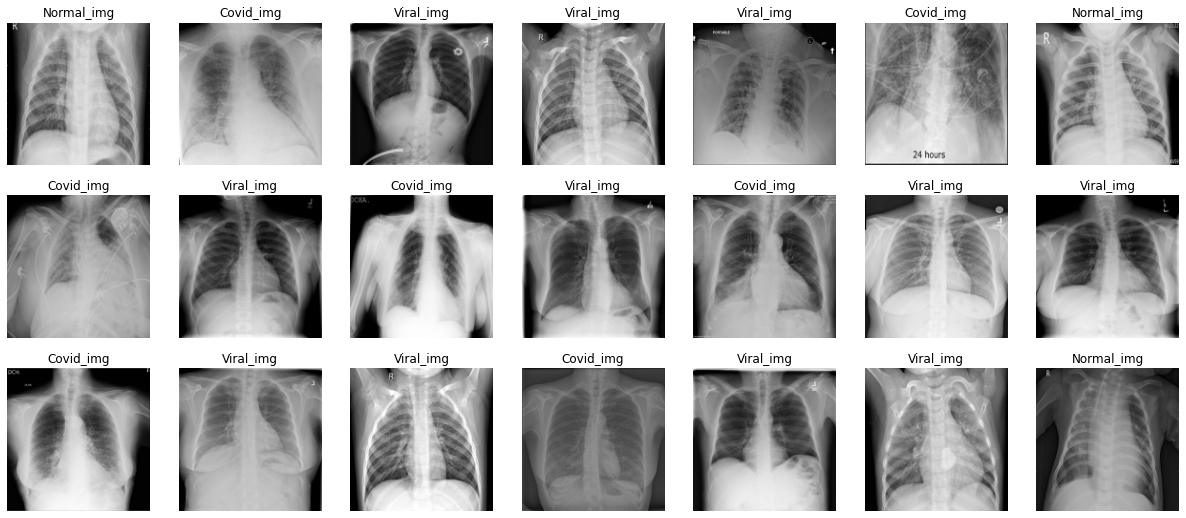

In [190]:
# Rows and columns are set to fit one training batch (32)
n_rows = 3
n_cols = 7
plt.figure(figsize=(n_cols * 3, n_rows * 3))
for images, labels in train_ds.take(1):
    for i in range (n_rows*n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis('off')
        plt.title(class_names[labels[i]], fontsize=12)
plt.subplots_adjust(wspace=.2, hspace=.2)